In [1]:
import numpy as np

# Qiskit Certification Prep - Module 0.1: Single-Qubit Operations

## Section 0.1.1: Pauli Gates

Pauli gates are the basic quantum logic gates. Their matrix representations and actions are:

- **X (NOT gate)**:
  $$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$$
  Swaps $|0⟩$ and $|1⟩$

- **Y**:
  $$Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}$$
  Applies a bit and phase flip

- **Z**:
  $$Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$$
  Flips the phase of $|1⟩$

/Users/jordanmakansi/mamba/envs/qiskit-cert-intel/lib/python3.9/site-packages/qiskit/circuit/equivalence.py:18: DeprecationWarning: The retworkx package is deprecated and has been renamed to rustworkx. Rustworkx is a drop-in replacement and can be used by replacing `import retworkx` with import `rustworkx`. 
  import retworkx as rx
/Users/jordanmakansi/mamba/envs/qiskit-cert-intel/lib/python3.9/site-packages/qiskit/version.py:20: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


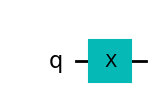

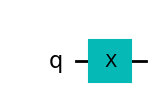

In [2]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

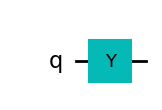

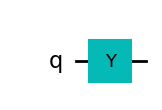

In [3]:
qc = QuantumCircuit(1)
qc.y(0)
qc.draw('mpl')

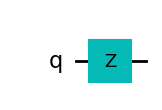

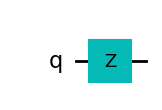

In [4]:
qc = QuantumCircuit(1)
qc.z(0)
qc.draw('mpl')

### Action of Pauli Gates on Basis States

In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Define |+⟩ and |−⟩ statevectors
plus = Statevector([1/2**0.5, 1/2**0.5])
minus = Statevector([1/2**0.5, -1/2**0.5])

# Create the X gate circuit
qc_x = QuantumCircuit(1)
qc_x.x(0)

# Evolve using .to_instruction()
plus_result = plus.evolve(qc_x.to_instruction())
minus_result = minus.evolve(qc_x.to_instruction())

print("X on |+⟩ →", plus_result)
print("X on |−⟩ →", minus_result)

X on |+⟩ → Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
X on |−⟩ → Statevector([-0.70710678+0.j,  0.70710678+0.j],
            dims=(2,))


### The $|+⟩$ and $|−⟩$ States

These are important quantum states often used when working with the Hadamard gate and measurement in the X-basis:

- $|+⟩ = \frac{1}{\sqrt{2}}(|0⟩ + |1⟩)$
- $|−⟩ = \frac{1}{\sqrt{2}}(|0⟩ - |1⟩)$

They form an **orthonormal basis**, just like $|0⟩$ and $|1⟩$, and are the eigenstates of the Hadamard gate.

### Identity: X = H Z H

In [6]:
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.z(0)
qc1.h(0)

qc2 = QuantumCircuit(1)
qc2.x(0)

print("Equivalent state:")
print(Statevector.from_label('0').evolve(qc1))
print(Statevector.from_label('0').evolve(qc2))

Equivalent state:
Statevector([-2.23711432e-17+0.j,  1.00000000e+00+0.j],
            dims=(2,))
Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


## Section 0.1.2: Rotation Gates

- **RX(θ)**:
  $$RX(\theta) = \begin{bmatrix} \cos(\theta/2) & -i\sin(\theta/2) \\ -i\sin(\theta/2) & \cos(\theta/2) \end{bmatrix}$$

- **RY(θ)**:
  $$RY(\theta) = \begin{bmatrix} \cos(\theta/2) & -\sin(\theta/2) \\ \sin(\theta/2) & \cos(\theta/2) \end{bmatrix}$$

- **RZ(θ)**:
  $$RZ(\theta) = \begin{bmatrix} e^{-i\theta/2} & 0 \\ 0 & e^{i \theta/2} \end{bmatrix}$$

### Advanced Example: Rotation Gate Composition
**Note**: Pauli gates are a special case of Rotation gates, *up to a global phase* where the angle of rotation is $\theta=\pi$.
You can compose multiple rotation gates. For example, two Rx(π/2) gates in a row are equivalent to Rx(π):

Applying $R_x(\pi/2)$ twice is the same as $R_x(\pi)$ up to global phase.

This can be verified with Qiskit:

In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc1 = QuantumCircuit(1)
qc1.rx(np.pi/2, 0)
qc1.rx(np.pi/2, 0)
state1 = Statevector.from_instruction(qc1)

qc2 = QuantumCircuit(1)
qc2.rx(np.pi, 0)
state2 = Statevector.from_instruction(qc2)

print("Are the two final states equal (up to global phase)?",
      state1.equiv(state2))

Are the two final states equal (up to global phase)? True


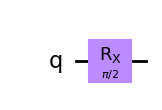

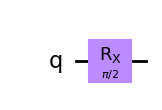

In [8]:
from numpy import pi
qc = QuantumCircuit(1)
qc.rx(pi/2, 0)
qc.draw('mpl')

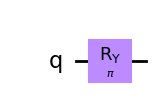

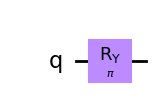

In [9]:
qc = QuantumCircuit(1)
qc.ry(pi, 0)  # Equivalent to Y gate
qc.draw('mpl')

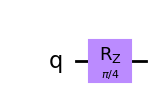

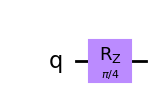

In [10]:
qc = QuantumCircuit(1)
qc.rz(pi/4, 0)
qc.draw('mpl')

## Section 0.1.3: Hadamard Gate

The **Hadamard gate (H)** creates a superposition:

$$H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

- $H|0⟩ = |+⟩$
- $H|1⟩ = |−⟩$

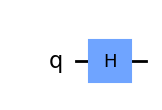

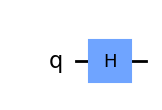

In [11]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw('mpl')

## Section 0.1.4: Useful Gate Identities and Algebra

### Properties of the Hadamard Gate:
- **Hermitian**: $H = H^\dagger$
- **Unitary**: $H^\dagger H = I$

### Common Identities:
- $X = HZH$
- $Z = HXH$
- $H^2 = I$
- $X^2 = Y^2 = Z^2 = I$
- $XYZ = iI$  → So $-iXYZ = I$

### Commutation / Anticommutation:
- $ZX = -XZ$
- $YX = -XY$
- $ZY = -YZ$

These identities arise from the non-commutative nature of quantum gates and are fundamental to quantum algorithms and error correction.

### Action of X on $|+⟩$ and $|−⟩$ States

The $|+⟩$ and $|−⟩$ states are defined as:
- $|+⟩ = \frac{1}{\sqrt{2}}(|0⟩ + |1⟩)$
- $|−⟩ = \frac{1}{\sqrt{2}}(|0⟩ - |1⟩)$

These are eigenstates of the Hadamard gate and are important for understanding quantum algorithms and measurement in different bases.

In [12]:
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit

# Define |+⟩ and |−⟩ statevectors
plus = Statevector([1/2**0.5, 1/2**0.5])
minus = Statevector([1/2**0.5, -1/2**0.5])

# Create the X gate circuit
qc_x = QuantumCircuit(1)
qc_x.x(0)
op_x = Operator(qc_x)

# Evolve the states
print("X on |+⟩ →", plus.evolve(op_x))
print("X on |−⟩ →", minus.evolve(op_x))

X on |+⟩ → Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
X on |−⟩ → Statevector([-0.70710678+0.j,  0.70710678+0.j],
            dims=(2,))


/Users/jordanmakansi/mamba/envs/qiskit-cert-intel/lib/python3.9/site-packages/qiskit/quantum_info/operators/operator.py:479: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  op = self.compose(mat, qargs=qargs)
/Users/jordanmakansi/mamba/envs/qiskit-cert-intel/lib/python3.9/site-packages/qiskit/quantum_info/operators/operator.py:479: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  op = self.compose(mat, qargs=qargs)


# 0.1.4 T and S gates

**What are $T$ and $S$?**  
- The **$T$ gate** (a $\pi/4$ phase gate) is $T=\mathrm{diag}(1, e^{i\pi/4})$.  
- The **$S$ gate** (a $\pi/2$ phase gate) is $S=\mathrm{diag}(1, e^{i\pi/2})=\mathrm{diag}(1, i)$.  
- The **$Z$ gate** is $Z=\mathrm{diag}(1,-1)=S^2=T^4$.

These are all **phase gates** acting on the $\{|0\rangle,|1\rangle\}$ basis. They leave $|0\rangle$ unchanged and add a phase to $|1\rangle$.

### Global vs relative phase (and a quick verification)
A single overall factor $e^{i\theta}$ multiplying the **entire** state is a **global phase** and is not observable. But $T$ and $S$ typically add a **relative phase** between the $|0\rangle$ and $|1\rangle$ components of a superposition:
$$
a|0\rangle + b|1\rangle \xrightarrow{\,T\,} a|0\rangle + b\,e^{i\pi/4}|1\rangle,\qquad
a|0\rangle + b|1\rangle \xrightarrow{\,S\,} a|0\rangle + b\,i\,|1\rangle.
$$
Relative phase changes interference and can affect measurements after further gates (e.g., Hadamards).

> **Note.** One can factor $T=e^{i\pi/8}R_z(\pi/4)$ and $S=e^{i\pi/4}R_z(\pi/2)$. The leading scalars are **global** phases; the $R_z$ rotations carry the observable **relative** phase.

### Implementing $T$ and $S$ in Qiskit (v2.x)
- As named gates: `qc.t(qubit)`, `qc.s(qubit)`, with inverses `qc.tdg(qubit)`, `qc.sdg(qubit)`.
- As rotations: `qc.rz(pi/4, qubit)` is equivalent to $T$ up to a global phase; `qc.rz(pi/2, qubit)` is equivalent to $S$ up to a global phase.
- Operators: `from qiskit.quantum_info import Operator; Operator(np.diag([1, np.exp(1j*np.pi/4)]))` builds $T$ explicitly.

### Identities (handy equalities)
- Powers: $T^2=S,\quad S^2=Z,\quad T^4=Z,\quad T^8=I$.
- Inverses: $T^\dagger = T^{-1} = \mathrm{diag}(1,e^{-i\pi/4}),\quad S^\dagger=\mathrm{diag}(1,-i)$.
- Conjugations with Hadamard (basis change): $HZH = X$ and $HXH = Z$ (useful when reasoning about phase vs bit flips).
- Commutation: All single-qubit phase gates $R_z(\phi)$ commute with one another (they are diagonal in the same basis).

**Key takeaways**
1. $T$ and $S$ are phase gates that add **relative** phase in superpositions; only the **relative** part is observable.  
2. $T=e^{i\pi/8}R_z(\pi/4)$ and $S=e^{i\pi/4}R_z(\pi/2)$: equal **up to global phase**.  
3. Memorize core identities: $T^2=S,\; S^2=Z,\; T^4=Z,\; T^8=I$.

In [14]:
# Verification: relative vs global phase using Qiskit v2.x
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Prepare |+> = (|0> + |1>)/sqrt(2)
qc = QuantumCircuit(1)
qc.h(0)
psi = Statevector.from_instruction(qc)

# Apply T and S
qc_t = qc.copy()
qc_t.t(0)
qc_s = qc.copy()
qc_s.s(0)

psi_t = Statevector.from_instruction(qc_t)
psi_s = Statevector.from_instruction(qc_s)

# Compare probabilities in Z-basis (the same), then in X-basis (different after additional H)
probs_psi = np.abs(psi.data)**2
probs_t   = np.abs(psi_t.data)**2
probs_s   = np.abs(psi_s.data)**2
print("Z-basis probabilities identical? T:", np.allclose(probs_psi, probs_t), " S:", np.allclose(probs_psi, probs_s))

# Check in X basis by applying an extra H (interference reveals relative phase)
def probs_after_h(sv):
    qc_h = QuantumCircuit(1)
    qc_h.h(0)
    return np.abs(Statevector.from_instruction(qc_h).evolve(sv).data)**2

print("X-basis |0>,|1> probs (no phase):", probs_after_h(psi))
print("X-basis |0>,|1> probs (after T):", probs_after_h(psi_t))
print("X-basis |0>,|1> probs (after S):", probs_after_h(psi_s))

# Equivalences up to global phase: T ~ e^{iπ/8} Rz(π/4), S ~ e^{iπ/4} Rz(π/2)

# Build the same prefix (H) before the alternative Rz gates
qc_t_alt = QuantumCircuit(1)
qc_t_alt.h(0)
qc_t_alt.rz(np.pi/4, 0)   # equivalent to T up to a global phase

qc_s_alt = QuantumCircuit(1)
qc_s_alt.h(0)
qc_s_alt.rz(np.pi/2, 0)   # equivalent to S up to a global phase

sv_t = Statevector.from_instruction(qc_t)       # H -> T
sv_t_alt = Statevector.from_instruction(qc_t_alt)  # H -> Rz(pi/4)

sv_s = Statevector.from_instruction(qc_s)       # H -> S
sv_s_alt = Statevector.from_instruction(qc_s_alt)  # H -> Rz(pi/2)

def equal_up_to_global(a, b):
    ip = np.vdot(a.data, b.data)
    return np.isclose(np.abs(ip), 1.0)

print("T equals Rz(pi/4) up to global phase:", equal_up_to_global(sv_t, sv_t_alt))
print("S equals Rz(pi/2) up to global phase:", equal_up_to_global(sv_s, sv_s_alt))


Z-basis probabilities identical? T: True  S: True
X-basis |0>,|1> probs (no phase): [0.5 0.5]
X-basis |0>,|1> probs (after T): [0.4267767 0.4267767]
X-basis |0>,|1> probs (after S): [0.25 0.25]
T equals Rz(pi/4) up to global phase: True
S equals Rz(pi/2) up to global phase: True


## Practice Questions

**Q1.** Which of the following gate sequences is equivalent to the identity operation (up to global phase)?
- A. $H X H Z H X H$
- B. $X Z X Z$
- C. $Y Y$
- D. $X Y Z$

**Q2.** Suppose you start with the state $|+⟩$. Which of the following gates will transform it to $|0⟩$?
- A. $H$
- B. $X$
- C. $H Z$
- D. $Z H$

**Q3.** Which of the following statements is true about the commutation of gates?
- A. $ZX = XZ$
- B. $ZY = -YZ$
- C. $XY = -YX$
- D. $XZ = ZY$

**Q4.** Which of the following expressions is equivalent to applying $X$ followed by $Z$ to a qubit?
- A. $XZ$
- B. $-ZX$
- C. $H Y H$
- D. $Y$

**Q5.** Which of the following is equivalent to applying $R_x(\pi)$?
- A. $X$
- B. $H Z H$
- C. Two $R_x(\pi/2)$ gates in sequence
- D. $Z X Z$

### Answer Key
- Q1: C
- Q2: A
- Q3: B
- Q4: B
- Q5: C